#### Imports

In [1]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous functions, e.g. to create the visual aids.

# Put all of your imports in this code block
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install pandas 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import copy
import seaborn as sns
import pandas as pd

#### Loading the data

In [2]:
features = np.genfromtxt("../data/features.txt", delimiter=",")
targets = np.genfromtxt("../data/targets.txt", delimiter=",")
unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")

In [3]:
targets = targets - np.min(targets)
labels = np.full((len(targets), int(np.max(targets)) + 1), 0)

# 1-hot encoding of the vectors as we will be using a softmax functionq
for i in range(len(targets)):
    labels[i, int(targets[i])] = 1

In [4]:
np.random.seed(42)

comb = []
for feature, label in zip(features, labels):
    comb.append((feature, label))
np.random.shuffle(comb)

# Here we split the data into training and testing sets
# Note, we will keep our test set independent of the training set for the whole training process
# We will further split the training set into a training and validation set later
comb_train = comb[:int(len(comb) * 0.85)]
comb_test = comb[int(len(comb) * 0.85):]

features_train = []
features_test = []
labels_train = []
labels_test = []

for i in range(len(comb_train)):
    features_train.append(comb_train[i][0])
    labels_train.append(comb_train[i][1])

for i in range(len(comb_test)):
    features_test.append(comb_test[i][0])
    labels_test.append(comb_test[i][1])
    
    
features_train = np.array(features_train)
features_test = np.array(features_test)
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)


In [5]:
assert features_train.shape[0] + features_test.shape[0] == 7854

## 1 Questions
### 1.2 Architecture
#### Question 1:

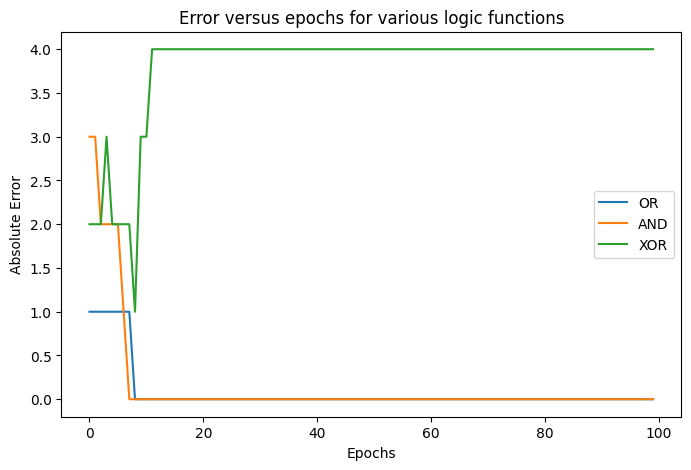

In [6]:
class Perceptron:
    def __init__(self, size):
        # Randomly initialize the weights and bias
        self.weights = np.random.rand(size)
        self.bias = np.random.rand()

    def predict(self, inputs):
        # Compute the weighted sum of the inputs and the bias
        res = inputs @ self.weights.T + self.bias
        return 1 if res > 0 else 0

    def train(self, inputs, labels, learning_rate, epochs):
        errors = []
        for e in range(epochs):
            total_error = 0
            for input, label in zip(inputs, labels):
                prediction = self.predict(input)
                error = label - prediction
                total_error += abs(error)

                # Propagate the error back to the weights and bias
                self.weights += learning_rate * error * input
                self.bias += learning_rate * error
            errors.append(total_error)
        return errors

def or_func(inputs):
    return int(any(inputs))

def and_func(inputs):
    return int(all(inputs))

def xor_func(inputs):
    return int(sum(inputs) % 2 != 0)

# Define the inputs and labels for training
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_or = np.array([or_func(input) for input in inputs])
labels_and = np.array([and_func(input) for input in inputs])
labels_xor = np.array([xor_func(input) for input in inputs])

perceptron_or = Perceptron(2)
perceptron_and = Perceptron(2)
perceptron_xor = Perceptron(2)

# Train the perceptrons
n_epochs = 100
alpha = 0.1
errors_or = perceptron_or.train(inputs, labels_or, alpha, n_epochs)
errors_and = perceptron_and.train(inputs, labels_and, alpha, n_epochs)
errors_xor = perceptron_xor.train(inputs, labels_xor, alpha, n_epochs)

# Plot the errors over epochs
fig = plt.figure(figsize = (8,5))
plt.plot(range(n_epochs), errors_or, label='OR')
plt.plot(range(n_epochs), errors_and, label='AND')
plt.plot(range(n_epochs), errors_xor, label='XOR')
plt.xlabel('Epochs')
plt.ylabel('Absolute Error')
plt.title('Error versus epochs for various logic functions')
plt.legend()
plt.show()

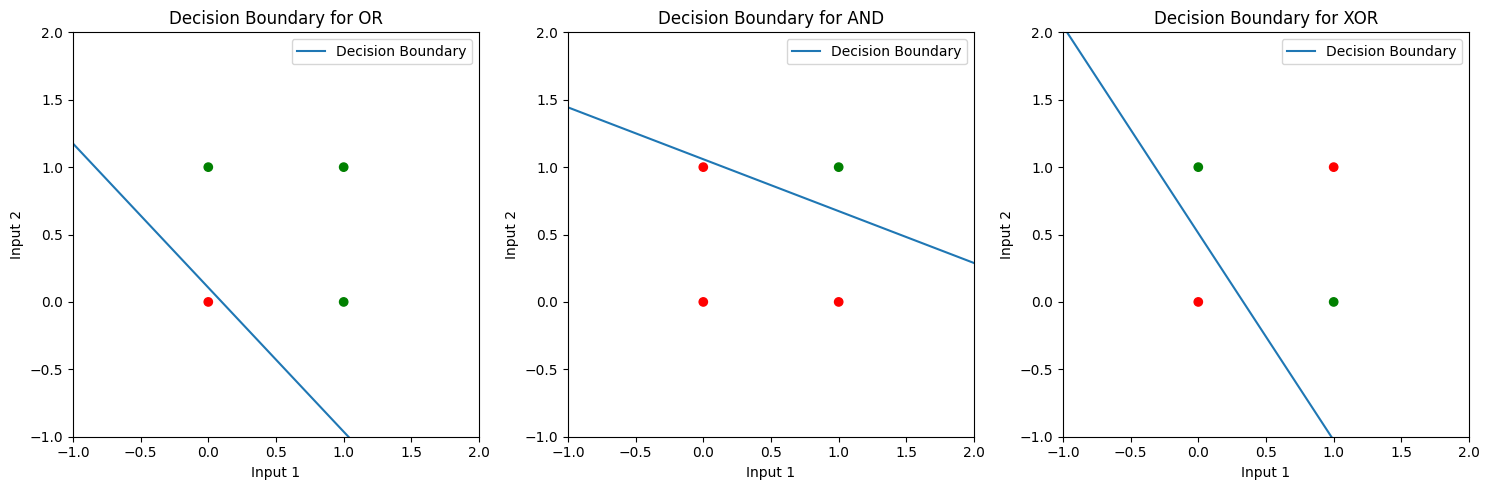

In [7]:
colors_or = ['green' if label == 1 else 'red' for label in labels_or]
colors_and = ['green' if label == 1 else 'red' for label in labels_and]
colors_xor = ['green' if label == 1 else 'red' for label in labels_xor]

# Plot the decision boundaries
x_values = np.linspace(-1, 2, 100)
y_values_or = - (perceptron_or.weights[0] * x_values + perceptron_or.bias) / perceptron_or.weights[1]
y_values_and = - (perceptron_and.weights[0] * x_values + perceptron_and.bias) / perceptron_and.weights[1]
y_values_xor = - (perceptron_xor.weights[0] * x_values + perceptron_xor.bias) / perceptron_xor.weights[1]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Decision boundary for OR
axs[0].plot(x_values, y_values_or, label='Decision Boundary')
axs[0].scatter(inputs[:, 0], inputs[:, 1], c=colors_or)
axs[0].set_xlabel('Input 1')
axs[0].set_ylabel('Input 2')
axs[0].set_xlim(-1, 2)
axs[0].set_ylim(-1, 2)
axs[0].legend()
axs[0].set_title("Decision Boundary for OR")

# Decision boundary for AND
axs[1].plot(x_values, y_values_and, label='Decision Boundary')
axs[1].scatter(inputs[:, 0], inputs[:, 1], c=colors_and)
axs[1].set_xlabel('Input 1')
axs[1].set_ylabel('Input 2')
axs[1].set_xlim(-1, 2)
axs[1].set_ylim(-1, 2)
axs[1].legend()
axs[1].set_title("Decision Boundary for AND")

# Decision boundary for XOR
axs[2].plot(x_values, y_values_xor, label='Decision Boundary')
axs[2].scatter(inputs[:, 0], inputs[:, 1], c=colors_xor)
axs[2].set_xlabel('Input 1')
axs[2].set_ylabel('Input 2')
axs[2].set_xlim(-1, 2)
axs[2].set_ylim(-1, 2)
axs[2].legend()
axs[2].set_title("Decision Boundary for XOR")

plt.tight_layout()
plt.show()

<div style="background-color:#f1be3e">

As seen in the error depicted over epochs, a single perceptron is able to learn the OR & AND functions, but not the XOR function. This is due to the fact that the XOR function is not linearly separable and will require a more complex architecture to be learned (like a MLP with a hidden layer). In the figures above, the decision boundary that was learned by the perception can be seen, and it is clear that it is not able to linearly separate the XOR function. In case of the other functions, the green and red dots are linearly separable, and the perceptron is able to learn the decision boundary that separates the two classes.

#### Question 2

<div style="background-color:#f1be3e">

For our classification task, as we are required to create a network that can classify an input of 10 features into one of 7 classes, we will require a network with 10 input neurons. This is due to the fact that the input layer of the network should typically have the same number of neurons as the number of features in the input data. 

#### Question 3

<div style="background-color:#f1be3e">

For the output layer, we will require 7 neurons, as we have 7 classes to classify the input data into. This is due to the fact that the output layer of the network should have the same number of neurons as the number of classes in the output data. Since, we are classifying the input data to classes that are mutually exlcusive, this also means we can use a softmax activation function in the output layer (which normalizes the scores to probabilities) and this means we can simply select the neuron with the highest probability as the predicted class (hence another reason why we need 7 neurons).

#### Question 4

<div style="background-color:#f1be3e">

The number of hidden layers and neurons in each layer is a hyperparameter that can be tuned to improve the performance of the network. For our classification task as we have 10 features and 7 classes to classify the input data into, we decided to start with a single hidden layer with 8 neurons. This is due to the fact that generally one can argue the number of neurons in the hidden layer should typically be less than the number of neurons in the input layer and greater than the number of neurons in the output layer (as at some point they converge, and this is a general heuristic). We have opted for one hidden layer as according to the Universial Approximation Theorem, with sufficient hidden neurons we can model any function. We naturally can increase the number of hidden layers if the performance of the network is not satisfactory. Throughout our code we ensure that we can construct a network to support an arbitrary number of hidden layers.

#### Question 5

<div style="background-color:#f1be3e">

We can use the ReLU activation function for the hidden layer neurons and the softmax activation function for the output layer neurons as we are working with mutually exclusive labels (and as the results are normalized we can simply select the output neuron with the highest probability). The ReLU activation function is a good choice for the hidden layer neurons as it is computationally efficient and allows the network to learn complex functions. The softmax activation function is a good choice for the output layer neurons as it is computationally efficient and allows the network to output probabilities for each class.

#### Question 6

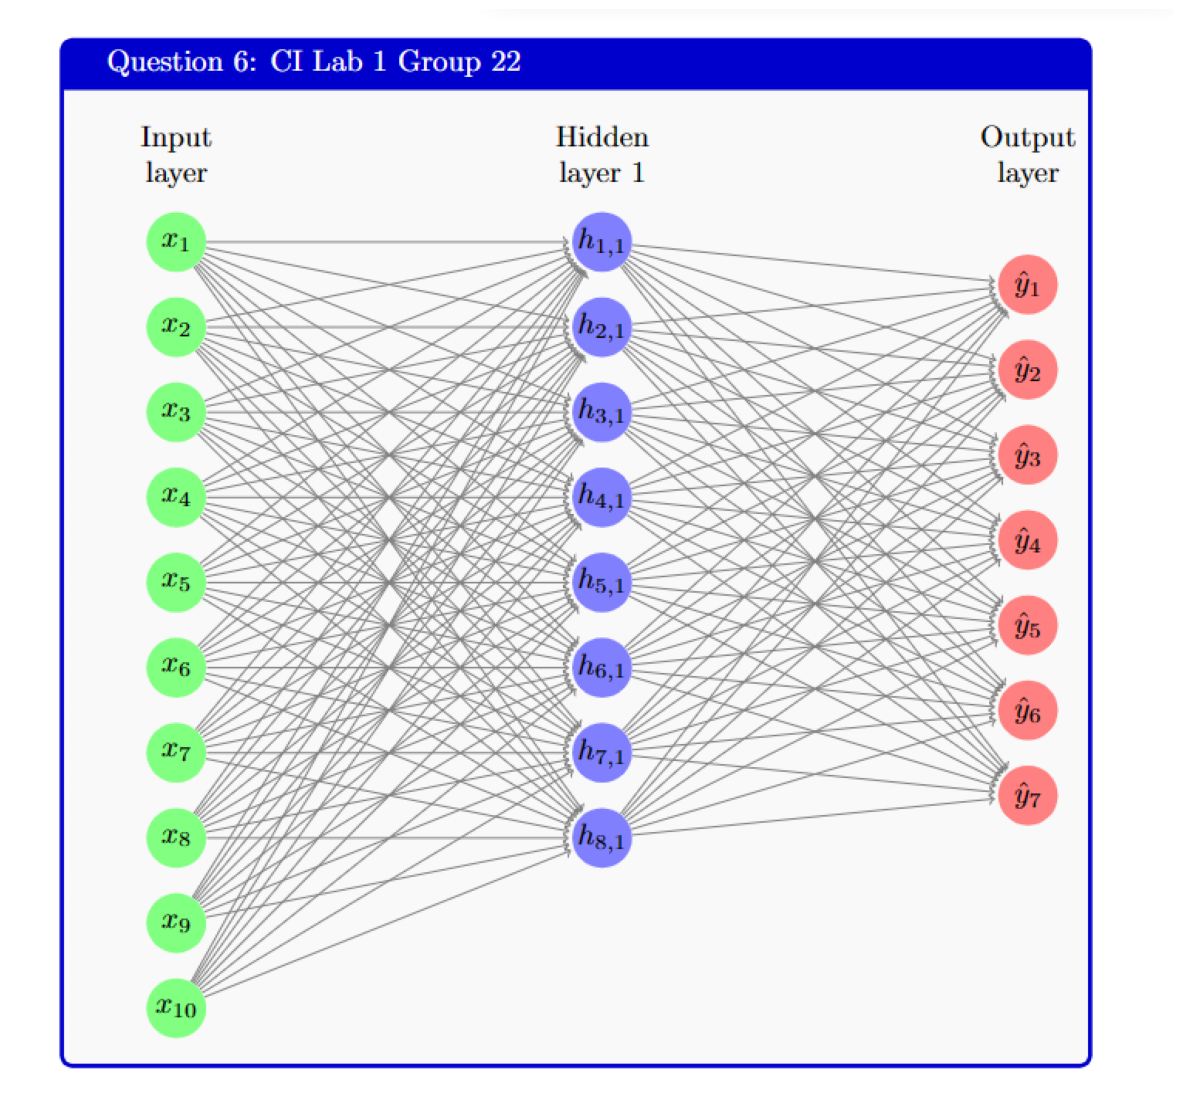

In [8]:
# It should be noted that to display the image in the final pdf as well, it is required to be a code output
plt.figure(figsize = (15,15))
plt.imshow(mpimg.imread("../data/schematic.png"))
plt.axis('off')
plt.show()

<div style="background-color:#f1be3e">
<!-- <img src="/../data/schematic.png" height="500px" width= "500px"alt="Image not displayed correctly"/> -->
For visualization purposes, we have ommitted the bias term in the hidden and input layers (as done in the lecture). We will naturally include these in the computations. Note, that at each layer all input neurons are connected to all neurons in the next layer. 


### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [9]:
class Linear:
    def __init__(self, in_features, out_features):
        """ Randomly initialize the weights and biases.

        Args:
            in_features: number of input features.
            out_features: number of output features.
        """
        self.weight = np.random.rand(in_features, out_features)
        self.bias = np.random.rand(out_features)
        

        self.cache = None
        # For storing the gradients w.r.t. the weight and the bias
        self.weight_grad = np.full(self.weight.shape, 0.0)
        self.bias_grad = np.full(self.bias.shape, 0.0)

    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input so it can be used in the backward pass.

        Args:
            x: input of a linear layer. => list with shape: n_features = in_features

        Returns: 
            y: output of a linear layer.  => list with shape: n_features = out_features 
        """
        self.cache = x
        return x @ self.weight + self.bias
    
    def backward(self, dupstream):
        """ Perform the backward pass of a linear layer.  

        Args:
            dupstream: upstream gradient.  => list with shape: n_features = out_features

        Returns:
            dx: downstream gradient. => list with shape: n_features = in_features
        """
        self.weight_grad += (self.cache * (np.repeat([dupstream], len(self.cache), axis=0).T)).T
        self.bias_grad += dupstream
        return dupstream @ self.weight.T

**Activation functions**

You alo need to implement an activation function suitable for the task at hand.

Think about how to perform the backward pass i.e., what is the local gradient and what the downstream gradient should be. Do not forget to take the upstream gradient into account.

In [10]:
# RELU activation function
class Activation:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. => list with shape: n_features

        Returns:
            y: output of the activation function. => list with shape: n_features
        """
        self.cache = x
        
        return np.maximum(0, x)
    
    def backward(self, dupstream): 
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient.  => list with shape: n_features

        Returns:
            dx: downstream gradient. => list with shape: n_features
        """
        
        return np.where(self.cache >= 0, dupstream, 0)

In [11]:
# Helper function to calculate the softmax
def softmax(x):
    _exps = np.exp(x - np.max(x))
    return _exps / np.sum(_exps)

In [12]:
# softmax activation function
class OutputActivation:
    def __init__(self):
        self.cache = None

    def forward(self, x):
        """ Perform a forward pass of your activation function.
        Store (cache) the output so it can be used in the backward pass.

        Args:
            x: input to the activation function. => list with shape: n_features

        Returns:
            y: output of the activation function. => list with shape: n_features
        """

        self.cache = softmax(x)
        return self.cache

    def backward(self, dupstream):
        """ Perform a backward pass of the activation function. 
        Make sure you do not modify the original dupstream.

        Args:
            dupstream: upstream gradient.  => list with shape: n_features

        Returns:
            dx: downstream gradient. => list with shape: n_features
        """
        
        return dupstream @ (self.cache * (np.identity(len(self.cache)) - self.cache).T)


**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [13]:
class Network:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. => list with shape: n_features = in_features of first layer

        Returns:
            y: predictions. => list with shape: out_features of last layer
        """
        
        for layer in self.layers:
            x = layer.forward(x)
        
        return x
    
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. => list with shape: out_features of last layer

        Returns:
            dx: downstream gradient. => list with shape: n_features = in_features of first layer
        """
        
        for layer in reversed(self.layers):
            dupstream = layer.backward(dupstream)
        
        return dupstream
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """
        for layer in self.layers:
            if isinstance(layer, Linear):
                layer.weight -= lr * layer.weight_grad
                layer.bias -= lr * layer.bias_grad
                
                # reset the gradients
                layer.weight_grad = np.full(layer.weight.shape, 0.0)
                layer.bias_grad = np.full(layer.bias.shape, 0.0)
        
        pass

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [14]:
def Loss(y_true, y_pred):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels. => list of one-hot encoded label vectors shape: n_classes
        y_pred: predicted labels. => list of predicted label vectors shape: n_classes

    Returns:
        loss: value of the loss.
        grad: gradient of loss with respect to the predictions. 
    """
    
    # replace all values close to zero with a small value
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    return -np.sum(y_true * np.log(y_pred)), -(y_true / y_pred)

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

In [15]:
# Helper function to calculate the accuracy
def perf(net, criterion, inputs, labels):
    correct_predictions = 0
    loss = 0
    for i in range(len(inputs)):
        res = net.forward(inputs[i])
        correct_predictions += np.argmax(res) == np.argmax(labels[i])
        loss += criterion(labels[i], res)[0]

    return correct_predictions / len(inputs), loss / len(inputs)

In [16]:
def train(net, inputs, labels, criterion, lr, n_epochs = 100, batch_size = 16, delta=0.005):
    """Trains the neural network.

    Args:
        net: network or model.
        inputs: input data. => list of input vectors in shape: (n_vectors/ n_data_points, n_features)
        labels: labels.   => list of one-hot encoded label vectors in shape: (n_vectors/ n_data_points, n_classes)
        criterion: loss function.
        lr: learning rate.
        n_epochs: number of training epochs.
        batch_size: size of mini-batches.

    Returns:
        train_losses: list of training losses.
        val_losses: list of validation losses.
        train_accuracies: list of training accuracies.
        val_accuracies: list of validation accuracies.
        validation_data: validation data.
        validation_labels: validation labels.
    """

    train_losses, val_losses, train_accuracies, val_accuracies, accuracies = [], [], [], [], []
    n_data = len(inputs)
    
    inputs = np.array(inputs)
    labels = np.array(labels)
    indexes = np.arange(len(inputs))
    np.random.shuffle(indexes)
    
    # Randomly shuffle the data
    inputs = inputs[indexes]
    labels = labels[indexes]
    
    # Split the data into training and validation sets
    train_data = inputs[:int(n_data * 0.9)]
    train_labels = labels[:int(n_data * 0.9)]
    validation_data = inputs[int(n_data * 0.9):]
    validation_labels = labels[int(n_data * 0.9):]
    
    for epoch in range(n_epochs):
        # Shuffle the data at each epoch as instructed in the lecture
        indexes = np.arange(len(train_data))
        np.random.shuffle(indexes)
        train_data = train_data[indexes]
        train_labels = train_labels[indexes]
        
        # Collect the mini-batches
        batches = []  
            
        for i in range(0, n_data, batch_size):
            batch_end = min(i + batch_size, len(train_data))
            batch = (train_data[i:batch_end], train_labels[i:batch_end])
            if not batch: # Skip empty batches
                continue
            batches.append(batch)
        
        # As instructed in the lecture, we will checkpoint within the epoch 3-5 times (here 4 times)
        checkpoint_interval = int(len(batches) / 4)
              
        for i, batch in enumerate(batches):
            batch_inputs, batch_labels = batch[0], batch[1]

            for j in range(len(batch_inputs)):
                x, y_one_hot = batch_inputs[j].flatten(), batch_labels[j].flatten()
                pred = net.forward(x)
                loss, grad = criterion(y_one_hot, pred)
                net.backward(grad)
            
            # Only update the weights and biases after the entire batch has been processed
            net.optimizer_step(lr)

            # Checkpoint within epoch
            if (i + 1) % checkpoint_interval == 0:
                train_acc, train_loss = perf(net, criterion, train_data, train_labels)
                val_acc, val_loss = perf(net, criterion, validation_data, validation_labels)
                val_accuracies.append(val_acc)
                train_accuracies.append(train_acc)
                val_losses.append(val_loss)
                train_losses.append(train_loss)
        
        # Additionally, also compute the accuracy and loss at the end of the epoch
        acc, loss = perf(net, criterion, train_data, train_labels)
        accuracies.append(acc)
        
        if len(accuracies) > 9 and math.fabs(accuracies[-1] - accuracies[-2]) < delta:
            break

    return train_losses, val_losses, train_accuracies, val_accuracies, validation_data, validation_labels

#### Question 7

In [17]:
def cross_validation(networks, loss_functions, lrs, features: np.ndarray, labels: np.ndarray, n_epochs: int = 100, batch_size: int = 16, training_n: int=10):
    """Performs k-fold cross-validation.

    Args:
        networks: 1D Numpy array of Networks to perform k-fold cross-validation on.
        loss_functions: 1D Numpy array of loss_functions, one for each Network.
        lrs: 1D Numpy array of learning rate values, one for each Network.
        features: The training data.
        labels: list of one-hot encoded label vectors in shape: (n_vectors/ n_data_points, n_classes)
        training_n: Number of times to train each Network (also the k parameter of k-fold cross-validation)

    Returns:
        performance: 1D Numpy array containing the performance of each respective Network provided.
    """

    performance = np.zeros(len(networks))
    
    p = np.random.RandomState(seed=42).permutation(len(features))
    features_p = np.array_split(features[p], training_n)
    labels_p = np.array_split(labels[p], training_n)

    for i in range(len(networks)):

        performance_t = np.zeros(training_n)

        for j in range(training_n):

            cur = copy.deepcopy(networks[i])

            validation = features_p.pop(j)
            validation_l = labels_p.pop(j)
            trai = np.row_stack(features_p)
            trai_l = np.row_stack(labels_p)
        
            train(cur, trai, trai_l, loss_functions[i], lrs[i], n_epochs, batch_size)
            performance_t[j] = compute_performance(cur, validation, validation_l)

            features_p.insert(j, validation)
            labels_p.insert(j, validation_l)

        performance[i] = np.mean(performance_t)

    return performance

def compute_performance(network: Network, validation: np.array, validation_l: np.ndarray):

    performance = 0

    for i in range(len(validation)):

        performance += 1 if (np.argmax(network.forward(validation[i])) == np.argmax(validation_l[i])) else 0

    return performance/len(validation)

<div style="background-color:#f1be3e">

**How do you divide your data to ensure unbiased estimate of performance?**

To ensure an unbiased estimate of performance, we shuffle the data (for the sake of reproducability, we use a fixed random seed in our implementation), divide it into 3 IDD sets without any overlap between them; the training set that will be purely used for training the NN and a smaller validation and test set. Then, the first set (training set) is divided into multiple mini-batches, a process which is repeated per epoch. This way, we ensure that the data are sampled truly randomly, and that the NN's performance is evaluated on unseen data, which in turn ensures an unbiased estimate.

#### Question 8

<div style="background-color:#f1be3e">

**How do you evaluate the performance of your network? Justify your answer.**

The performance of the network is computed through the training and validation losses, which are calculated over the entire training and validation sets respectively. They are calculated multiple times per epoch, and are then used to determine the performance of the NN, as well as whether there is overfitting or underfitting at play. As a high training and validation loss indicate underfitting, and a decreasing training loss and increasing validation loss indivate overfitting, we aim for both our losses to decrease as the NN is trained more and more (which is exactly what we observed for our chosen network). If the validation loss especially is low and the gap between the two plots hasn't widened, we can determine that the NN exhibits high performance.

Finally, as we'll explain later in this report in detail, the accuracies on both the validation and test set were also used in the end to evaluate the performance of our NN. We aimed for both of them to be high, and for the test accuracy not to be significantly lower than the validation accuracy, as this is an indication of its capability to generalize when encountering unseen data

#### Question 9

<div style="background-color:#f1be3e">

**When and why do you decide to end the training?**

We decide to end the training after a select number of epochs have passed (by default 100). This limit is placed in order to avoid overfitting and ensure that the training happens within a reasonable timeframe. We've also implemented a form of early stopping in our implementation, as our training may end prematurely after the validation accuracy has converged, that is, if its value doesn't change by more than 0.005 between two consecutive epochs. This is done to speed up the training prodecure even further, and make sure that the training is halted before the validation accuracy may start dropping.

#### Question 10

In [18]:
# Initialization Approaches
def uniform(val):
    return lambda n, m : (np.full((n, m), val), np.full(m, val))

def random(n, m):
    return np.random.rand(n, m), np.random.rand(m)

def He(n, m):
    return np.random.normal(0, np.sqrt(2 / m), (n, m)), np.random.normal(0, np.sqrt(2 / m), m)

def xavier(n, m):
    return np.random.normal(0, np.sqrt(1 / m), (n, m)), np.random.normal(0, np.sqrt(1 / m), m)

def normal(n, m):
    return np.random.normal(0, 1, (n, m)), np.random.normal(0, 1, m)

In [19]:
# Applies a given initialization approach to a layer
def apply_init(layer, init):
    if isinstance(layer, Linear):
        layer.weight, layer.bias = init(layer.weight.shape[0], layer.weight.shape[1])

In [20]:
def plot_init(net: Network, init, initName, initOutput, features, labels, lr, n_epochs=100):
    # Initialize all layers except output layer with the chose initialization weights
    for layer in net.layers:
        apply_init(layer, init)
    
    # Initialize the output layer's weights with chosen approach
    apply_init(net.layers[-2], initOutput)
    
    train_losses, val_losses, train_accuracies, val_accuracies, val_data, val_labels = train(net=net, inputs=features, labels=labels, criterion=Loss, lr=lr, n_epochs=n_epochs, batch_size=16)
    
    # Plot the losses and accuracies
    fig, axs = plt.subplots(1, 2, figsize=(8, 5))
  
    mes = "Loss and accuracy versus epochs for initialization " + initName
    fig.suptitle(mes)
    axs[0].plot(np.arange(1, (len(train_losses)/ 4) + 1, 0.25) , train_losses, label='Training Loss', color='red')
    axs[0].plot(np.arange(1, (len(val_losses)/ 4) + 1, 0.25) , val_losses, label='Validation Loss', color='green')
    axs[0].set_ylabel("Loss")
    axs[0].set_xlabel("Epochs")
    axs[0].legend()
    axs[0].set_xticks(np.arange(1, (len(train_losses) / 4) + 1))
    
    axs[1].plot(np.arange(1, (len(train_accuracies)/ 4) + 1, 0.25) , train_accuracies, label='Training Accuracy', color='red')
    axs[1].plot(np.arange(1, (len(val_accuracies)/ 4) + 1, 0.25) , val_accuracies, label='Validation Accuracy', color='green')
    axs[1].set_ylabel("Accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].legend()
    axs[1].set_xticks(np.arange(1, (len(train_accuracies) / 4) + 1))
    
    
    plt.tight_layout()
    plt.show()
    
    # Return the relevant loss and accuracy values
    return train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
# Define the neural network that we hypothesize will perform well
net = Network([Linear(10, 8), Activation(), Linear(8, 7),  Activation(), Linear(7, 7), OutputActivation()])

# Prepare the initialization strategies
init_strats = [ (He, "He"), (He, "He 2"), (xavier, "Xavier"), (xavier, "Xavier 2"), (normal, "Normal Distribution"), (normal, "Normal Distribution 2"), (uniform(0.5), "Constant 0.5"), (uniform(0.5), "Constant 0.5 2"), (random, "Random 1"), (random, "Random 2")]

# Collect the results of the different initialization strategies
overview = []
for(init, name) in init_strats:
    train_losses, val_losses, train_accuracies, val_accuracies = plot_init(net=net, init=init, initName=name, initOutput=xavier, features=features, labels=labels, lr=0.005, n_epochs=100)
    overview.append((train_losses, val_losses, train_accuracies, val_accuracies, name))


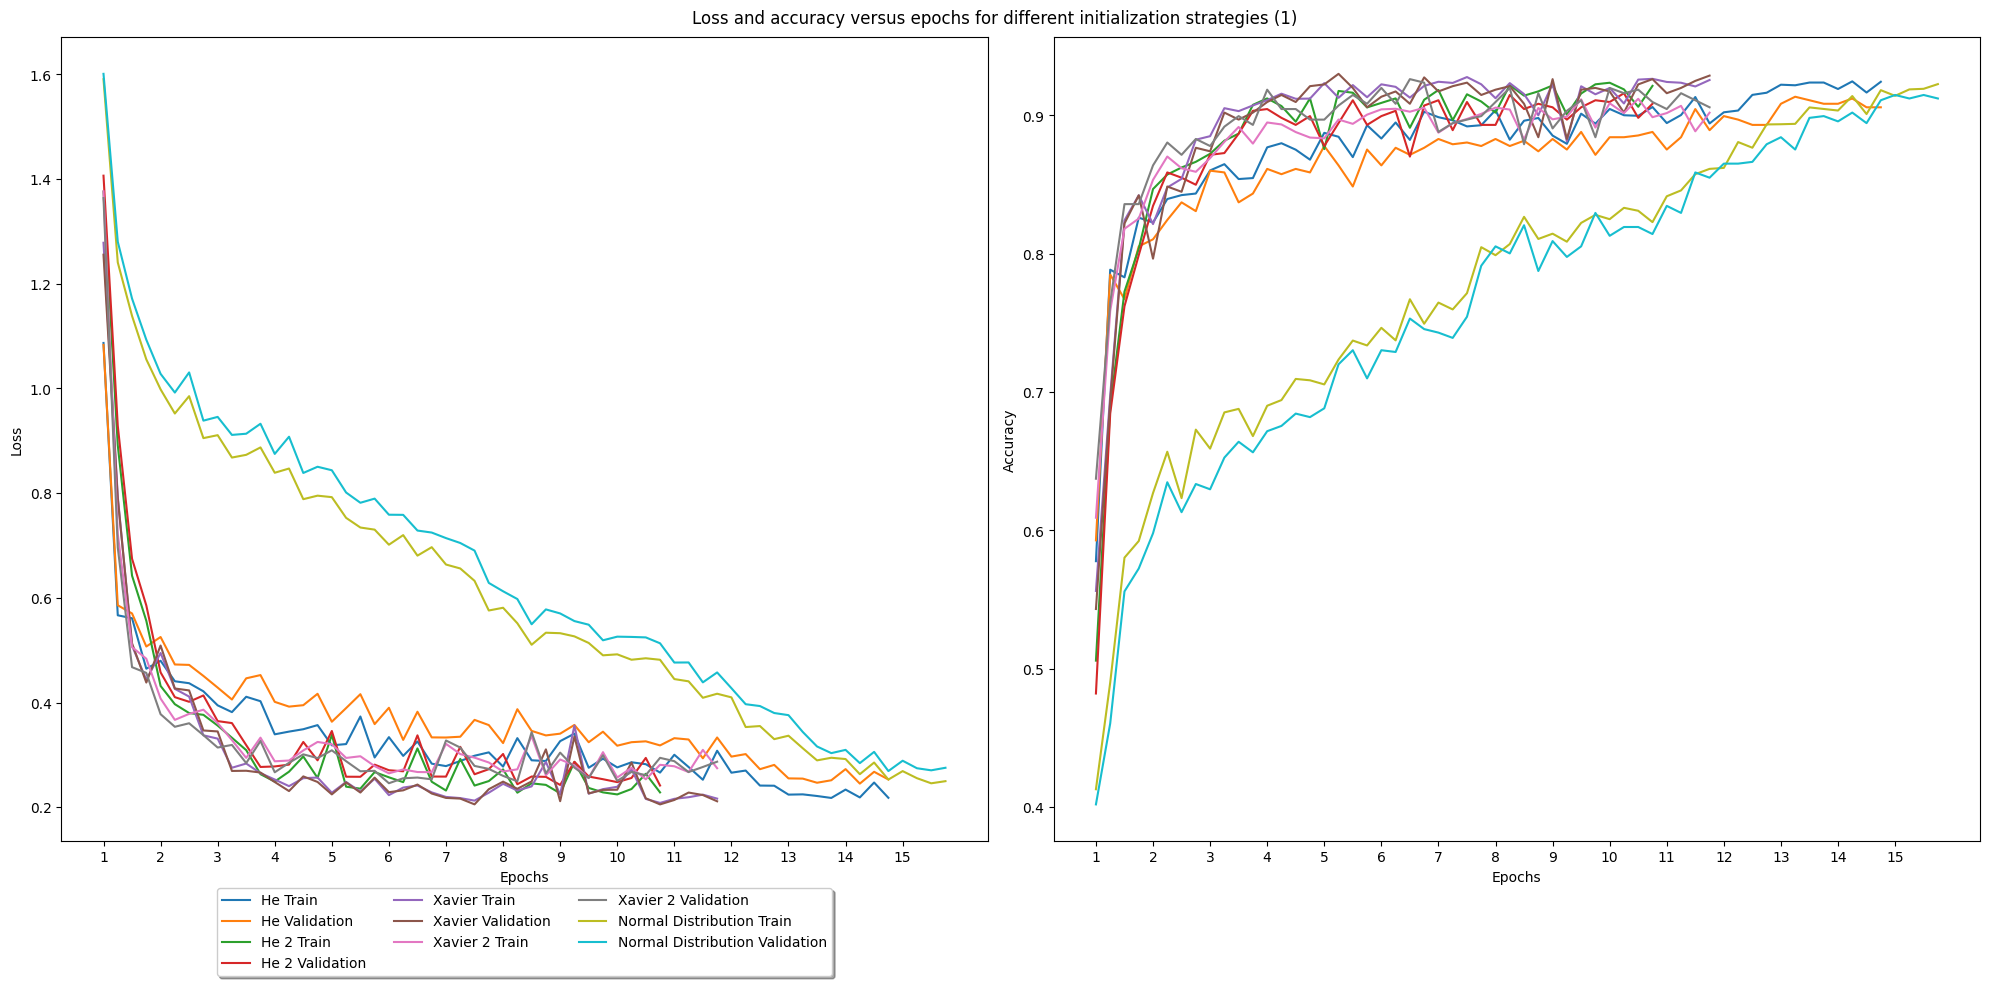

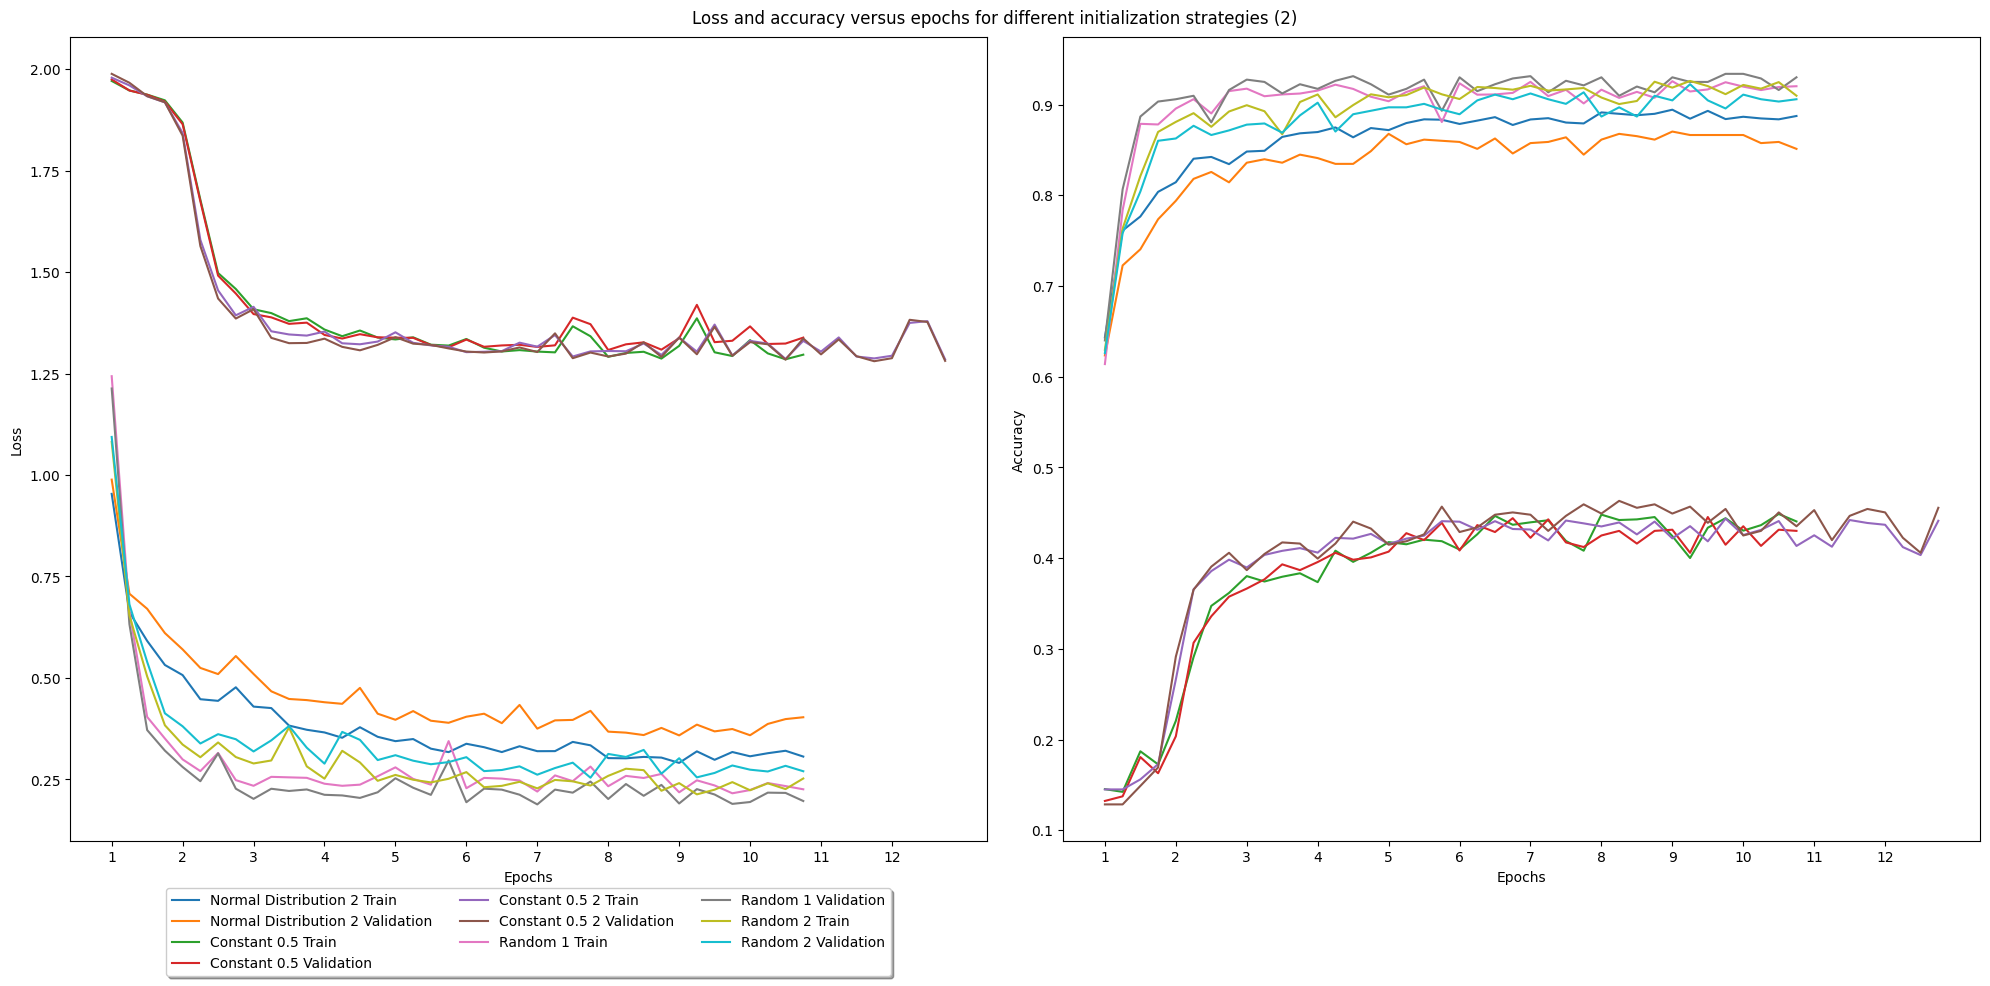

In [ ]:
# Plot the overview of the different initialization strategies
overview1 = overview[:5]
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("Loss and accuracy versus epochs for different initialization strategies (1)")
max_epochs = max([len(train_losses) / 4 for (train_losses, val_losses, train_accuracies, val_accuracies, name) in overview1])
for (train_losses, val_losses, train_accuracies, val_accuracies, name) in overview1:
    axs[0].plot(np.arange(1, (len(train_losses)/ 4) + 1, 0.25) , train_losses, label=name + ' Train')
    axs[0].plot(np.arange(1, (len(val_losses)/ 4) + 1, 0.25) , val_losses, label=name + ' Validation')
    axs[1].plot(np.arange(1, (len(train_accuracies)/ 4) + 1, 0.25) , train_accuracies, label=name + ' Train')
    axs[1].plot(np.arange(1, (len(val_accuracies)/ 4) + 1, 0.25) , val_accuracies, label=name + ' Validation')
    
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_xticks(np.arange(1, max_epochs + 1))


axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_xticks(np.arange(1, max_epochs + 1))

# Set the legend below the plot
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)

plt.tight_layout()
plt.show()

overview2 = overview[5:]
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("Loss and accuracy versus epochs for different initialization strategies (2)")
max_epochs = max([len(train_losses) / 4 for (train_losses, val_losses, train_accuracies, val_accuracies, name) in overview2])
for (train_losses, val_losses, train_accuracies, val_accuracies, name) in overview2:
    axs[0].plot(np.arange(1, (len(train_losses)/ 4) + 1, 0.25) , train_losses, label=name + ' Train')
    axs[0].plot(np.arange(1, (len(val_losses)/ 4) + 1, 0.25) , val_losses, label=name + ' Validation')
    axs[1].plot(np.arange(1, (len(train_accuracies)/ 4) + 1, 0.25) , train_accuracies, label=name + ' Train')
    axs[1].plot(np.arange(1, (len(val_accuracies)/ 4) + 1, 0.25) , val_accuracies, label=name + ' Validation')
    
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_xticks(np.arange(1, max_epochs + 1))


axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_xticks(np.arange(1, max_epochs + 1))

# Set the legend below the plot
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3)

plt.tight_layout()
plt.show()

<div style="background-color:#f1be3e">

Initialization using a constant value seems to not really work at all. It reaches a comparitavely low accuracy and hovers there, this makes sense due to the problem of "breaking the symetry". Because if all weights are initialized to the same value that means that they all learn the same behaviors as their gradients are all basically the same for any given training sample.
Random initilization works better than the constant value, since it somewhat consistenly reaches a higher accuracy, but it's still not nearly as high as some of the other methods. This is likely due to the fact that the random initialization is not as well suited to the activation functions used, and causes an uneven distribution of weights, which in turn causes the network to learn slower. The normal distribution works better, but still not as well as compared to xavier and He, as it reaches it's peak accuracy much slower, and it's peak is slightly lower. He and xavier both reach a very high accuracy, and do socomparitevely quickly, with He reaching a slightly higher accuracy than xavier. This is likely due to the fact that He is better suited to the ReLU activation function, which is used in the hidden layers, and xavier is better suited to the softmax activation function, which is used in the output layer.


### 1.4 Optimization

#### Question 11

In [ ]:
# Define the number of neurons and the respective networks in the hidden layer that we want to test
# Note this process takes around ~15-20 minutes locally
n_h_neurons = np.array([7, 10, 15, 25, 30])
nets = [Network([Linear(10, n), Activation(), Linear(n, 7),  Activation(), Linear(7, 7), OutputActivation()]) for n in n_h_neurons]

# Apply the initialization strategies to the networks except for the output layer
for net in nets:
    for lay in net.layers:
        apply_init(lay, He)
    apply_init(net.layers[-2], xavier)

# Perform cross-validation to find the best network
# Performance is the accuracy of the network across the different cross-validation folds (average of all folds)
performance = cross_validation(networks=nets, loss_functions=np.full(n_h_neurons.shape, Loss), lrs=np.full(n_h_neurons.shape, 0.005), features=features, labels=labels)

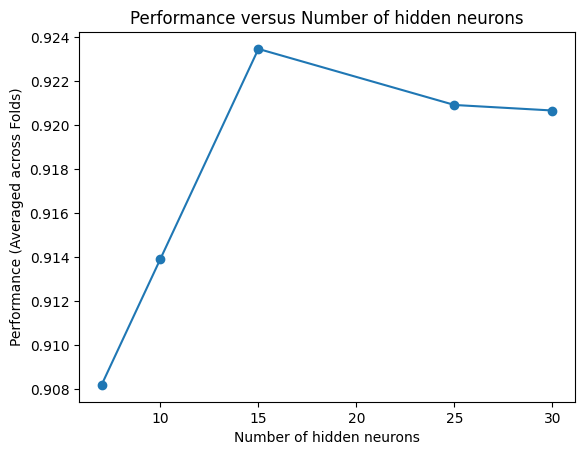

In [ ]:
# plot performance versus n_h_neurons
plt.plot(n_h_neurons, performance, marker='o')
plt.xlabel("Number of hidden neurons")
plt.ylabel("Performance (Averaged across Folds)")
plt.title("Performance versus Number of hidden neurons")
plt.show()

<div style="background-color:#f1be3e">

We observe that the optimal training performance occurs at around 25 hidden neurons, the performance gradually increases up to this point, and then gradually decreases beyond. This seems sensible since the network is able to learn more complex functions with more hidden neurons, but at some point the network starts to overfit on the training data. Therefore decreasing the performance on the validation set (which is what is plotted).

#### Question 12

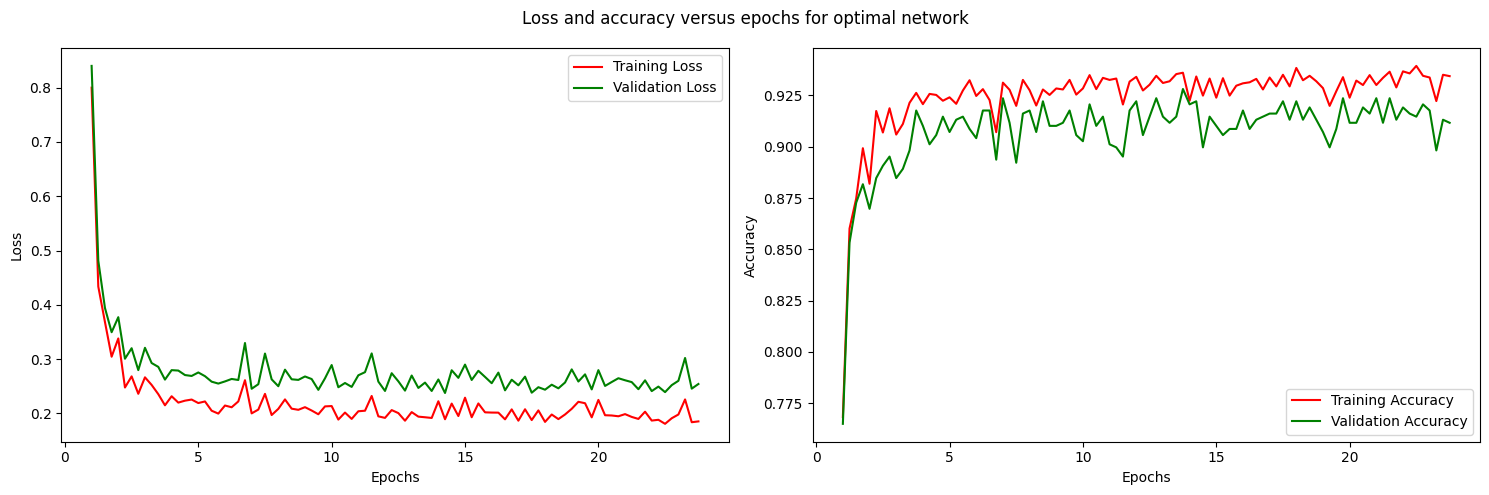

In [ ]:
net = Network([Linear(10, 25), Activation(), Linear(25, 7),  Activation(), Linear(7, 7), OutputActivation()])
for lay in net.layers:
        apply_init(lay, He)
apply_init(net.layers[-2], xavier)
train_losses, validation_losses, train_accuracies, val_accuracies, val_data, val_labels = train(net=net,inputs=features_train, labels=labels_train, criterion=Loss, lr=0.005, n_epochs=100, batch_size=16, delta=0.0005)

# plot the losses and accuracies
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Loss and accuracy versus epochs for optimal network")
axs[0].plot(np.arange(1, (len(train_losses)/ 4) + 1, 0.25) , train_losses, label='Training Loss', color='red')
axs[0].plot(np.arange(1, (len(validation_losses)/ 4) + 1, 0.25) , validation_losses, label='Validation Loss', color='green')
axs[0].set_ylabel("Loss")
axs[0].set_xlabel("Epochs")
axs[0].legend()

axs[1].plot(np.arange(1, (len(train_accuracies)/ 4) + 1, 0.25) , train_accuracies, label='Training Accuracy', color='red')
axs[1].plot(np.arange(1, (len(val_accuracies)/ 4) + 1, 0.25) , val_accuracies, label='Validation Accuracy', color='green')
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].legend()

plt.tight_layout()
plt.show()

<div style="background-color:#f1be3e">

The training accuracy reaches approaches it's turning point at around 3 epochs, after which it's increase flattens out, and we see a consistent accuracy of roughly 0.9. Something similar happens with the Loss, although there are some more extreme spikes here and there. Consistently we see that the Validation loss and accuracy pretty closely follow that of the training loss and accuracy, which is a good sign. This means that the network is not overfitting on the training data, and is able to generalize well to the validation data. The validation accuracy is consistently a little lower, and it's loss a little higher, which shows there's still some patterns that the network is capturing that aren't in all data points. But due to the relatively small discrepancy this is not a major concern, and overall the network seems to perform well.

### 1.5 Evaluation

#### Question 13

In [ ]:
# Define the optimally performing network
trueNet = Network([Linear(10, 25), Activation(), Linear(25, 7),  Activation(), Linear(7, 7), OutputActivation()])
for lay in trueNet.layers:
        apply_init(lay, He)
apply_init(trueNet.layers[-2], xavier)

# Traing on all the training data
train_losses, validation_losses, accuracies, losses, val_data_final, val_labels_final = train(net=trueNet, inputs=features_train, labels=labels_train, criterion=Loss, lr=0.005, n_epochs=100, batch_size=16, delta=0.0005)

In [ ]:
cm_temp = np.zeros((7, 7), dtype="int")

# Calculate accuracy on test_features and test_labels
correct_predictions = 0
for i in range(len(features_test)):

    pred = np.argmax(trueNet.forward(features_test[i]))
    truth = np.argmax(labels_test[i])
    correct_predictions += pred == truth
    cm_temp[pred][truth] += 1

accuracy = correct_predictions / len(features_test)

In [ ]:
# Calculate accuracy on validation set
correct_predictions_val = 0
for i in range(len(val_data_final)):

    correct_predictions_val += np.argmax(trueNet.forward(val_data_final[i])) == np.argmax(val_labels_final[i])

accuracy_val = correct_predictions_val / len(val_data_final)
print("Accuracy on validation set: ", accuracy_val * 100, "%")
print("Accuracy on test set: ", accuracy * 100, "%")

Accuracy on validation set:  92.81437125748504 %
Accuracy on test set:  92.45122985581001 %


<div style="background-color:#f1be3e">

**What is the success rate of your network on the test set? How does it compare to the results of the validation set?**

As you can see above, the success rates/accuracies of our network on the test and validation sets are both very close and high, measuring up to over 90%. This means that out of all the samples in the test and validation sets, over 90% of them are correctly classified. This is a very good outcome, as the high test accuracy shows that the NN has robust generalization capabilities when encountering unseen data. Also, because the test accuracy isn't much lower than the validation accuracy, this is a strong indication that there is no overfitting at play, as the validation set was used to tune the hyperparameters and therefore has had significant influence in the model's training.

#### Question 14

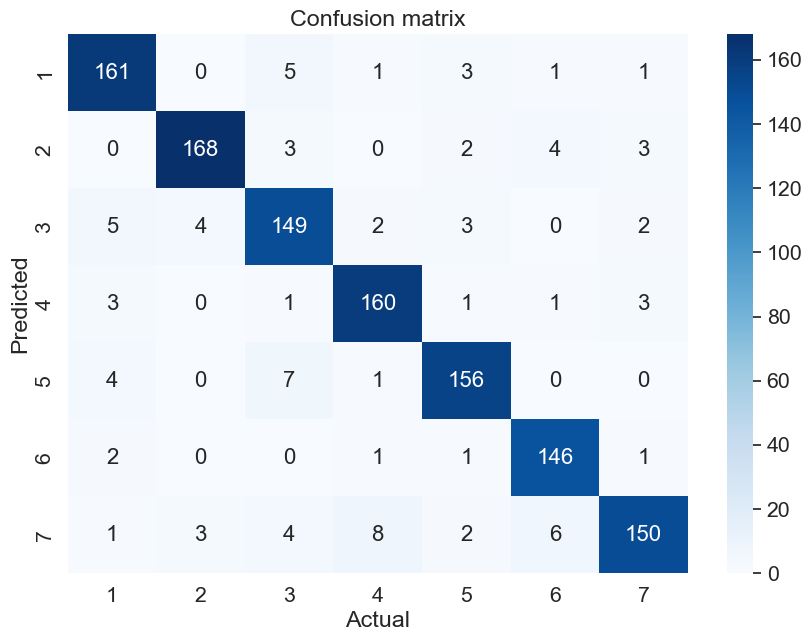

In [ ]:
cm = pd.DataFrame(cm_temp, [1,2,3,4,5,6,7], [1,2,3,4,5,6,7])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap="Blues")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

<div style="background-color:#f1be3e">

**Show and discuss a confusion matrix constructed on your test set. How should it be read? Where does your network make the mostmistakes?**

Above we have created a confusion matrix constructed on our test set. The 7 values that make up the range of values in X axis represent the 7 ground-truth labels that all of the data in our test set belong to, while the 7 values that make up the range of values in Y axis represent the predicted classes which the NN has classified the above data into. Therefore, if a sample with ground truth label 7 gets (wrongly) classified into class 6 by the NN, the cell (X,Y)=(7,6) will be incremented by 1. As the hues of blue of each cell get darker the higher the value, it's a very good indication that the main diagonal of our matrix has also the darkest colors. This means that the grand majority of samples get classified correctly, which is in line with the very high test accuracy we got above.

In [ ]:
print("Most mistakes are made when classifying the samples with a ground-truth label of", np.argmax(np.sum(cm_temp))+1)

Most mistakes are made when classifying the samples with a ground-truth label of 1


#### Question 15

In [ ]:
predictions = (np.argmax(trueNet.forward(unknown), 1) + 1).reshape(1, -1).astype(int)
predictions

array([[2, 6, 7, 3, 6, 5, 1, 3, 7, 7, 3, 3, 1, 3, 6, 4, 2, 4, 2, 2, 7, 5,
        6, 6, 5, 1, 5, 3, 1, 6, 6, 4, 4, 4, 4, 4, 5, 2, 3, 7, 4, 6, 5, 5,
        5, 7, 5, 4, 5, 1, 5, 5, 2, 1, 6, 3, 1, 7, 1, 1, 3, 6, 3, 2, 7, 2,
        2, 2, 7, 7, 7, 6, 7, 1, 4, 1, 4, 4, 1, 7, 1, 7, 6, 4, 4, 2, 3, 2,
        1, 7, 6, 2, 7, 1, 2, 7, 2, 2, 5, 2, 5, 7, 5, 5, 2, 6, 5, 6, 2, 3,
        7, 4, 1, 5, 5, 7, 5, 2, 4, 4, 7, 1, 2, 1, 1, 4, 7, 4, 7, 7, 7, 6,
        6, 7, 7, 4, 4, 4, 3, 5, 3, 4, 1, 5, 2, 6, 6, 5, 4, 7, 7, 4, 1, 7,
        1, 3, 7, 4, 3, 6, 7, 7, 3, 4, 1, 5, 6, 2, 5, 5, 3, 1, 6, 4, 7, 3,
        3, 5, 5, 1, 3, 4, 1, 1, 2, 3, 3, 2, 5, 3, 4, 6, 1, 6, 6, 2, 2, 3,
        6, 7, 7, 2, 5, 3, 5, 6, 7, 4, 2, 2, 3, 6, 2, 6, 6, 4, 2, 6, 1, 3,
        1, 3, 6, 2, 2, 6, 7, 1, 6, 1, 1, 5, 2, 4, 5, 4, 4, 4, 7, 7, 4, 1,
        5, 5, 3, 1, 1, 6, 6, 5, 4, 4, 6, 2, 6, 6, 6, 1, 5, 3, 5, 3, 3, 6,
        1, 2, 6, 6, 6, 2, 4, 5, 3, 5, 3, 3, 4, 7, 6, 4, 3, 6, 7, 7, 2, 2,
        7, 2, 1, 4, 6, 3, 4, 5, 4, 6, 

For the autograder our latest submission got 15/20 points.

### 1.6 Scikit-learn

#### Question 16

<div style="background-color:#f1be3e">

Most of the hyper parameters we chose are the same as the ones we found in the toolbox: our Neural network performs better with 25 hidden neurons in one layer rather than 9. We use Relu activation function same as the toolbox optimal. We found our network performs best with a learning rate of 0.005 same as the toolbox (although we previously used 0.05 as the learning rate which was unstable). Our loss function doesn't use regularization. A consequence of the higher number of neurons is that while our network might converge faster during training it is more susceptible to overfitting.

#### Question 17

In [ ]:

nets = [Network([Linear(10, 9), Activation(), Linear(9, 7),  Activation(), Linear(7, 7), OutputActivation()]),Network([Linear(10, 25), Activation(), Linear(25, 7),  Activation(), Linear(7, 7), OutputActivation()]) ]
for net in nets:
    for lay in net.layers:
           apply_init(lay, He)
    apply_init(net.layers[-2], xavier)
performance = cross_validation(networks=nets, loss_functions=[Loss,Loss], lrs=[0.005,0.005], features=features, labels=labels)

print(" performance using optimal hyper parameters from TOOLBOX:", performance[0])
print(" performance using our hyper parameters v0: ", performance[1])

<div style="background-color:#f1be3e">

We found that the optimal hyper paramters in the toolbox are:
Best parameters found by grid search:
-activation: relu
-alpha: 0.01
-batch_size: auto
-early_stopping: True
-hidden_layer_sizes: [9]
-learning_rate_init: 0.005
-max_iter: 40
-n_iter_no_change: 10
-random_state: 42
-solver: adam
-tol: 0.0001
-validation_fraction: 0.12749999999999997

We previously used a learning rate of 0.05. Changing this to the 0.005 value has improved the accuracy by a few % and has improved the stability by a **lot**. While our network performs better using 25 hidden neurons, both the 9 and 25 perform similarly hovering above 90% accuracy. We think that the change of the learning_rate factor was an improvement as it avoided the network from taking too large steps and overshooting the minimum (causing variance in losses at times). We think that the change of the number of neurons (9) that was identified by the toolbox was still suffcient, as it was able to learn the correct weights of the networks, yet our 25 neurons also work and are able to capture the complex functions.

### 1.7 Reflection

#### Question 18

<div style="background-color:#f1be3e">

One example of ANNs failing to correctly classify while being a result of bias is using it to identify whether skin lesions in a patient are either cancerous or benign. Imagine a ANN that has been trained on data that is predominately from white patients (and thereby a lack of representation of data from people-of-color). Such a ANN is susceptible to bias and the inability to correctly classify skin lesions on people of color (a result of lack of training data). This can have detrimental impacts such as loss of life or the inability to receive medical attention quick enough. A good (unbiased) implementation of a ANN on the other hand can free up medical professionals, provide easier access to medical care for more people and reduce costs. A false positive can inflict on the patient a great amount of financial and mental stress. A false negative can lead do a late or no diagnosis. An early diagnosis has a 99% 5-year survival rate while a late on has a 30% survival rate.

#### Question 19

<div style="background-color:#f1be3e">

One way to mitigate the harm produced is to add human oversight and review of the system. Having all (or a subset) of positive results go through manual checking of professionals will minimise false positives and negative consequences for the patient. There will also be human review for borerline negative results to reduce the number of undiagnosed cases while not overworking the human profesionals.

Alternatively, we can ensure the AI is trained on a diverse dataset (all skin types, age categories, genders, ethnicities). Medical science has always had problems with biased sample sized (most early studies agree only). Hence, we can always retrospectively retrain/ensure that the model has the most representative dataset (a regular repeated process).

Naturally, this does not mean that the problem is solved for everyone, but this is a step in mitigating the harm produced by unjust (initial) classification.

### 1.8 Pen and paper

#### Question 20

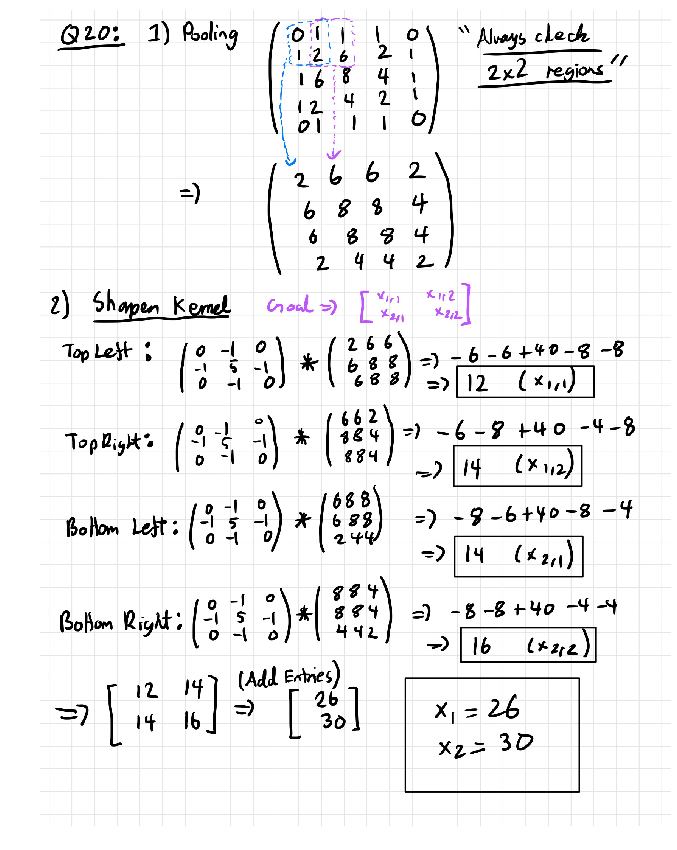

In [ ]:
plt.figure(figsize = (15,15))
plt.imshow(mpimg.imread("../data/Q20_Group_22.jpeg"))
plt.axis('off')
plt.show()

#### Question 21

<Figure size 1080x1080 with 0 Axes>

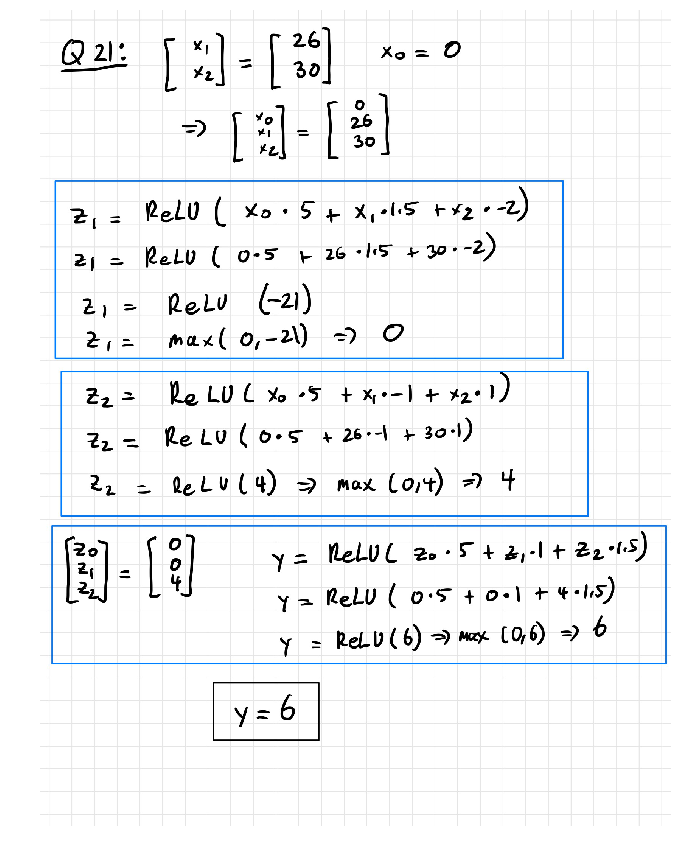

In [ ]:
plt.figure(figsize = (15,15))
plt.imshow(mpimg.imread("../data/Q21_Group_22.jpeg"))
plt.axis('off')
plt.show()

### 1.9 Division of work

#### Question 22

<div style="background-color:#f1be3e">

|          Component          |  Sagar Chethan Kumar   | Alexandru Şologon    |  Christos Tamvakas   | Karsten van der Deijl |
|-----------------------------|--------------|-------------|--------------|-----------------------|
| Code (design)               |     0.25     |     0.25    |     0.25     | 0.25                  |
| Code (implementation)       |     0.3      |     0.1     |     0.3      | 0.3                   |
| Code (validation)           |     0.23     |     0.25    |     0.25     | 0.25                  |
| Experiments (execution)     |     0.2      |     0.3     |     0.3      | 0.2                   |
| Experiments (analysis)      |     0.25     |     0.25    |     0.25     | 0.25                  |
| Experiments (visualization) |     0.3      |     0.2     |     0.2      | 0.3                   |
| Report (original draft)     |     0.25     |     0.25    |     0.25     | 0.25                  |
| Report (reviewing, editing) |     0.25     |     0.25    |     0.25     | 0.25                  |

### References

<div style="background-color:#f1be3e">

**If you made use of any non-course resources, cite them below.**
- https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6


In [ ]:
# As instructed a code block that writes the predictions to the file
predictNetwork = Network([Linear(10, 25), Activation(), Linear(25, 7),  Activation(), Linear(7, 7), OutputActivation()])
for lay in predictNetwork.layers:
        apply_init(lay, He)
apply_init(predictNetwork.layers[-2], xavier)

train_losses, validation_losses, accuracies, losses, val_data_final, val_labels_final = train(net=predictNetwork, inputs=features_train, labels=labels_train, criterion=Loss, lr=0.005, n_epochs=100, batch_size=16, delta=0.0005)
predictions = (np.argmax(predictNetwork.forward(unknown), 1) + 1).reshape(1, -1).astype(int)

predictions.tofile("22_classes.txt", sep=",", format="%s")